In [ ]:
# FIFA 21 Complete Players Dataset
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

data = pd.read_csv('players_21.csv')
data.head(4)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,33,1987-06-24,170,72,Argentina,FC Barcelona,...,66+3,65+3,65+3,65+3,66+3,62+3,52+3,52+3,52+3,62+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,35,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,54+3,54+3,54+3,61+3
2,200389,https://sofifa.com/player/200389/jan-oblak/210002,J. Oblak,Jan Oblak,27,1993-01-07,188,87,Slovenia,Atlético Madrid,...,32+3,36+3,36+3,36+3,32+3,32+3,33+3,33+3,33+3,32+3
3,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,31,1988-08-21,184,80,Poland,FC Bayern München,...,64+3,65+3,65+3,65+3,64+3,61+3,60+3,60+3,60+3,61+3


<ipython-input-9-bb40aedeb728>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=position_counts, x='Position', y='Count', palette='viridis')


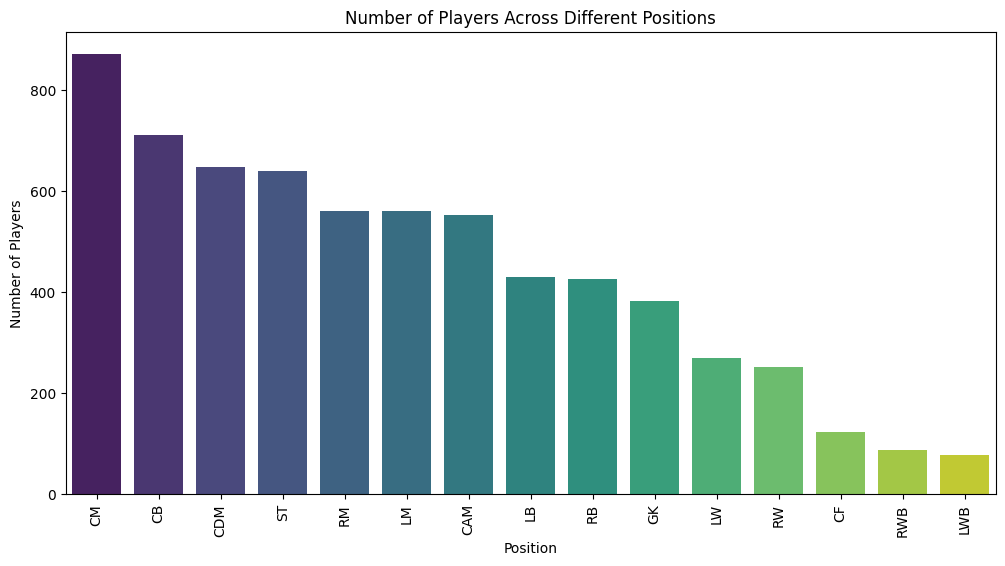

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

position_counts = data['player_positions'].str.split(', ', expand=True).stack().value_counts().reset_index()
position_counts.columns = ['Position', 'Count']
plt.figure(figsize=(12, 6))
sns.barplot(data=position_counts, x='Position', y='Count', palette='viridis')
plt.title('Number of Players Across Different Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

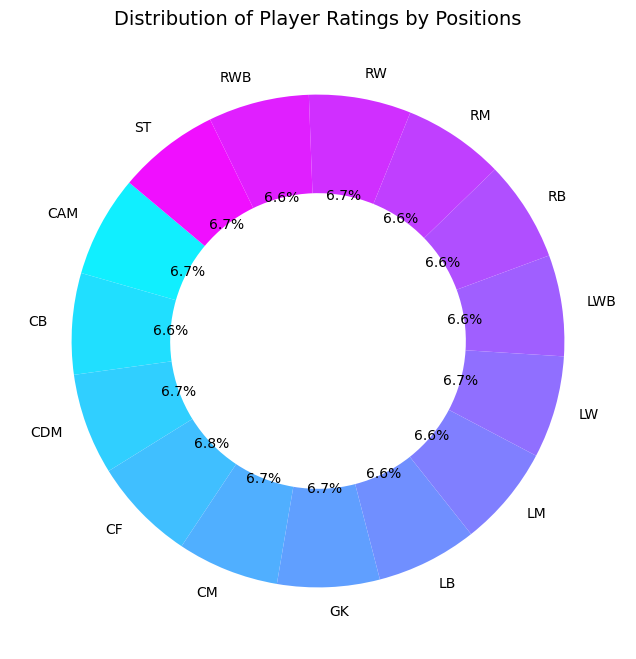

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
positions = data['player_positions'].str.split(',').explode().str.strip()
ratings_by_position = positions.reset_index().merge(data[['overall']], left_on='index', right_index=True)
average_ratings = ratings_by_position.groupby('player_positions')['overall'].mean()
labels = average_ratings.index
sizes = average_ratings.values
colors = sns.color_palette('cool', len(labels))
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors, wedgeprops=dict(width=0.4))
plt.title("Distribution of Player Ratings by Positions", fontsize=14)
plt.gca().set_aspect('equal')  # Ensures pie is drawn as a circle
plt.show()

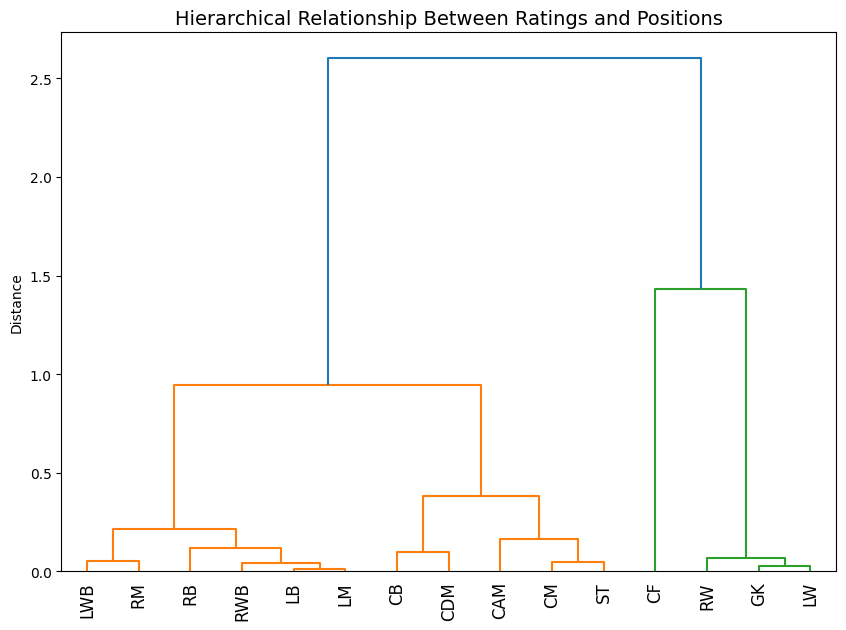

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
positions = data['player_positions'].str.split(',').explode().str.strip()
ratings_by_position = positions.reset_index().merge(data[['overall']], left_on='index', right_index=True)
average_ratings = ratings_by_position.groupby('player_positions')['overall'].mean()
hierarchical_data = average_ratings.reset_index()
hierarchical_data.columns = ['Positions', 'Average Rating']
linked = linkage(hierarchical_data['Average Rating'].values.reshape(-1, 1), method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked, labels=hierarchical_data['Positions'].values, orientation='top', leaf_rotation=90)
plt.title("Hierarchical Relationship Between Ratings and Positions", fontsize=14)
plt.ylabel("Distance")
plt.show()